# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Support Vector Classifier Strategy Code

In this notebook, you will learn to create a support vector classifier (SVC) algorithm on S&P500. 

SVCs are supervised learning models. A set of training data is provided to the SVC algorithm, each belonging to one of the categories. For instance, the categories can be either to buy or to sell a stock. The algorithm builds a model during the training phase and assigns new data into one of the categories based on the model created during the training phase.

In this notebook, you will perform the following steps:

1. [Import the libraries](#import)
2. [Read S&P500 data](#s&p500_data)
3. [Define the explanatory variables](#explanatory_variables)
3. [Define the target variables](#target_variables)
4. [Split the data into train and test](#train_test)
5. [Support Vector Classifier (SVC)](#SVC)
6. [Classifier accuracy](#Classifier_accuracy)
7. [Strategy implementation](#Strategy_implementation)


<a id='import'></a> 
## Import the libraries

In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='s&p500_data'></a> 
## Read S&P500 data
The OHLC data for the stocks is stored in the CSV file. To read a CSV file, you can use `read_csv` method of `pandas`. The syntax is shown below.

Syntax: 
```python
import pandas as pd
pd.read_csv(filename, index_col)
```
1. filename: Name of the file in the string format
2. index_col: Column(s) to use as the row labels of the dataframe, either given as string name or column index

We will read the S&P500 data from CSV file.

In [2]:
# The data is stored in the directory 'data'
path = '../data/'

# Read the csv file using read_csv method of pandas
Df = pd.read_csv(path + 'SPY.csv', index_col=0)

# Convert index to datetime format
Df.index = pd.to_datetime(Df.index)

# Print the first five rows 
Df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,3442870000
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000


<a id='explanatory_variables'></a> 
## Define the explanatory variables

Explanatory or independent variables are used to predict the value response variable. The X is a dataset that holds the variables which are used for prediction. The X consists of variables such as 'Open - Close' and 'High - Low'. These can be understood as indicators based on which the algorithm will predict tomorrow's trend. Feel free to add more indicators and see the performance.

In [3]:
# Create predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low

# Store all predictor variables in a variable X
X = Df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2018-12-31,-7.910156,26.419922
2019-01-02,-33.070068,52.020020
2019-01-03,44.030029,49.179932
2019-01-04,-57.609863,63.739990
2019-01-07,-14.079834,41.599854


<a id='target_variables'></a> 
## Define the target variable

Target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow's price is greater than today's price then we will buy the S&P500 index, else we will have no position in the S&P500 index. We will store +1 for a buy signal and 0 for a no position in y.

We use `where()` function from NumPy to do this.

Syntax:
```python
import numpy as np
np.where(condition,value_if_true,value_if_false) 
```
Parameters 

Condition: Condition to check

value_if_true: Value if the condition is satisfied 

value_if_false: Value If the condition is not satisfied

In [4]:
# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'], 1, 0)

<a id='train_test'></a> 
## Split the data into train and test

We will split data into training and test data set. This is done so that we can evaluate the effectiveness of the model in the test dataset.

1. First, 80% of data is used for training and remaining data for testing.
2. X_train and y_train are training dataset.
3. X_test and y_test are test dataset.

In [5]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

<a id='SVC'></a> 
# Support Vector Classifier (SVC)
We will use SVC() function from sklearn.svm.SVC library to create our classifier model using fit() method on the training data set.

Syntax:
```python
from sklearn.svm import SVC
SVC().fit(X, y) 
```
Parameters 

X: Explanatory variables in the training set

y: Target variable in the training set

In [6]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

<a id='Classifier_accuracy'></a> 
# Classifier accuracy
We will compute the accuracy of the algorithm on the train and test data set by comparing the actual values of signal with the predicted values of signal. The function accuracy_score() will be used to calculate the accuracy.

Syntax:
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_predicted) 
```
Parameters 

y_true: Actual/correct labels

y_predicted: Predicted labels, as returned by the classifier

In [7]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 59.69%
Test Accuracy: 54.32%


An accuracy of 50%+ in test data suggests that the classifier model is effective.

<a id='Strategy_implementation'></a> 
## Strategy implementation

### Predict signal 

We will predict the signal (buy or sell) using the cls.predict() function.

### Compute returns in test period

We will compute the strategy returns based on the predicted signal, and then save it in the column 'geometric returns' and plot the geometric returns.

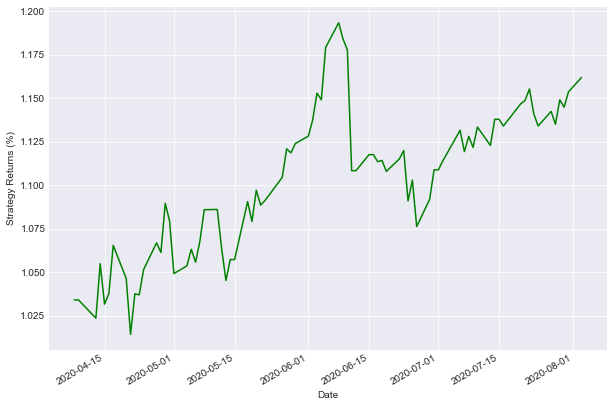

In [8]:
# Predicted Signal
Df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
Df['Return'] = Df.Close.pct_change()

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal.shift(1)

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

As seen from the graph, the strategy generates a return of approximately 16% in the test data set.<br>

This notebook shows how you can implement the Support Vector Classifier strategy step by step with Python. You can train and test your model and also check the strategy implementation with a visual representation (graph).

## Tweak the code
You can tweak the code in the following ways:

1. Use different data sets: backtest and try out the model on different data sets!
2. Features: create your features using different indicators that could improve the prediction accuracy.

In the next units, you will be able to practice some important things learned in this section. In the next section, you will learn natural language processing and its implementation in sentiment analysis.
<br><br>